In [1]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
outpath='HAT-264-0000126.rlc.tfalc'
data=Table.read(outpath,format='ascii')
t=data['col2']
mag=data['col8']

Text(0.5, 0, 'time (BJD-2454833)')

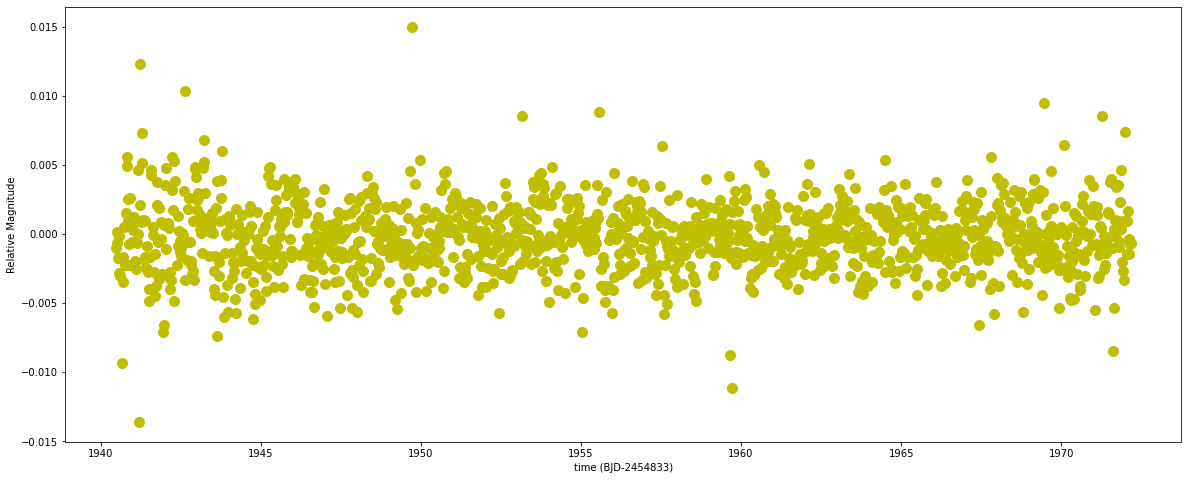

In [3]:
plt.figure(figsize=(20,8))
plt.plot(t,mag,'yo',markersize=10,label='HAT-264-0000126')
plt.ylabel('Relative Magnitude')
plt.xlabel('time (BJD-2454833)')

In [4]:
import astrobase
from astrobase import periodbase, checkplot
periodbase.use_astropy_bls()

[I 200811 15:57:28 __init__:84] An Astropy implementation of BLS is available because Astropy >= 3.1.
[I 200811 15:57:28 __init__:86] If you want to use it as the default periodbase BLS runner, call the periodbase.use_astropy_bls() function.


In [5]:
dates=data['col2']
fluxes=data['col8']
errs=fluxes*0.01

In [6]:
glsp = periodbase.pgen_lsp(dates,fluxes,errs)

[I 200811 15:57:28 zgls:597] using autofreq with 1580 frequency points, start P = 0.100, end P = 31.690
[I 200811 15:57:28 zgls:607] using 6 workers...


In [7]:
cp = checkplot.checkplot_png(glsp, dates, fluxes, errs, magsarefluxes=True)

[I 200811 15:57:31 nonphysical:216] spline fit done. nknots = 13,  chisq = 13433165.67694, reduced chisq = 9921.09725
[I 200811 15:57:31 png:696] plotting phased LC with period 0.804304, epoch 1965.40420
[I 200811 15:57:31 nonphysical:216] spline fit done. nknots = 13,  chisq = 13472242.19363, reduced chisq = 9949.95731
[I 200811 15:57:31 png:696] plotting phased LC with period 0.402152, epoch 1940.47757
[I 200811 15:57:31 nonphysical:216] spline fit done. nknots = 13,  chisq = 13456901.25690, reduced chisq = 9938.62722
[I 200811 15:57:31 png:696] plotting phased LC with period 1.608607, epoch 1940.47757
[I 200811 15:57:31 nonphysical:216] spline fit done. nknots = 13,  chisq = 13450278.08231, reduced chisq = 9933.73566
[I 200811 15:57:31 png:696] plotting phased LC with period 2.934219, epoch 1946.32101
[I 200811 15:57:31 nonphysical:216] spline fit done. nknots = 13,  chisq = 13513895.64799, reduced chisq = 9980.72057
[I 200811 15:57:31 png:696] plotting phased LC with period 0.16436

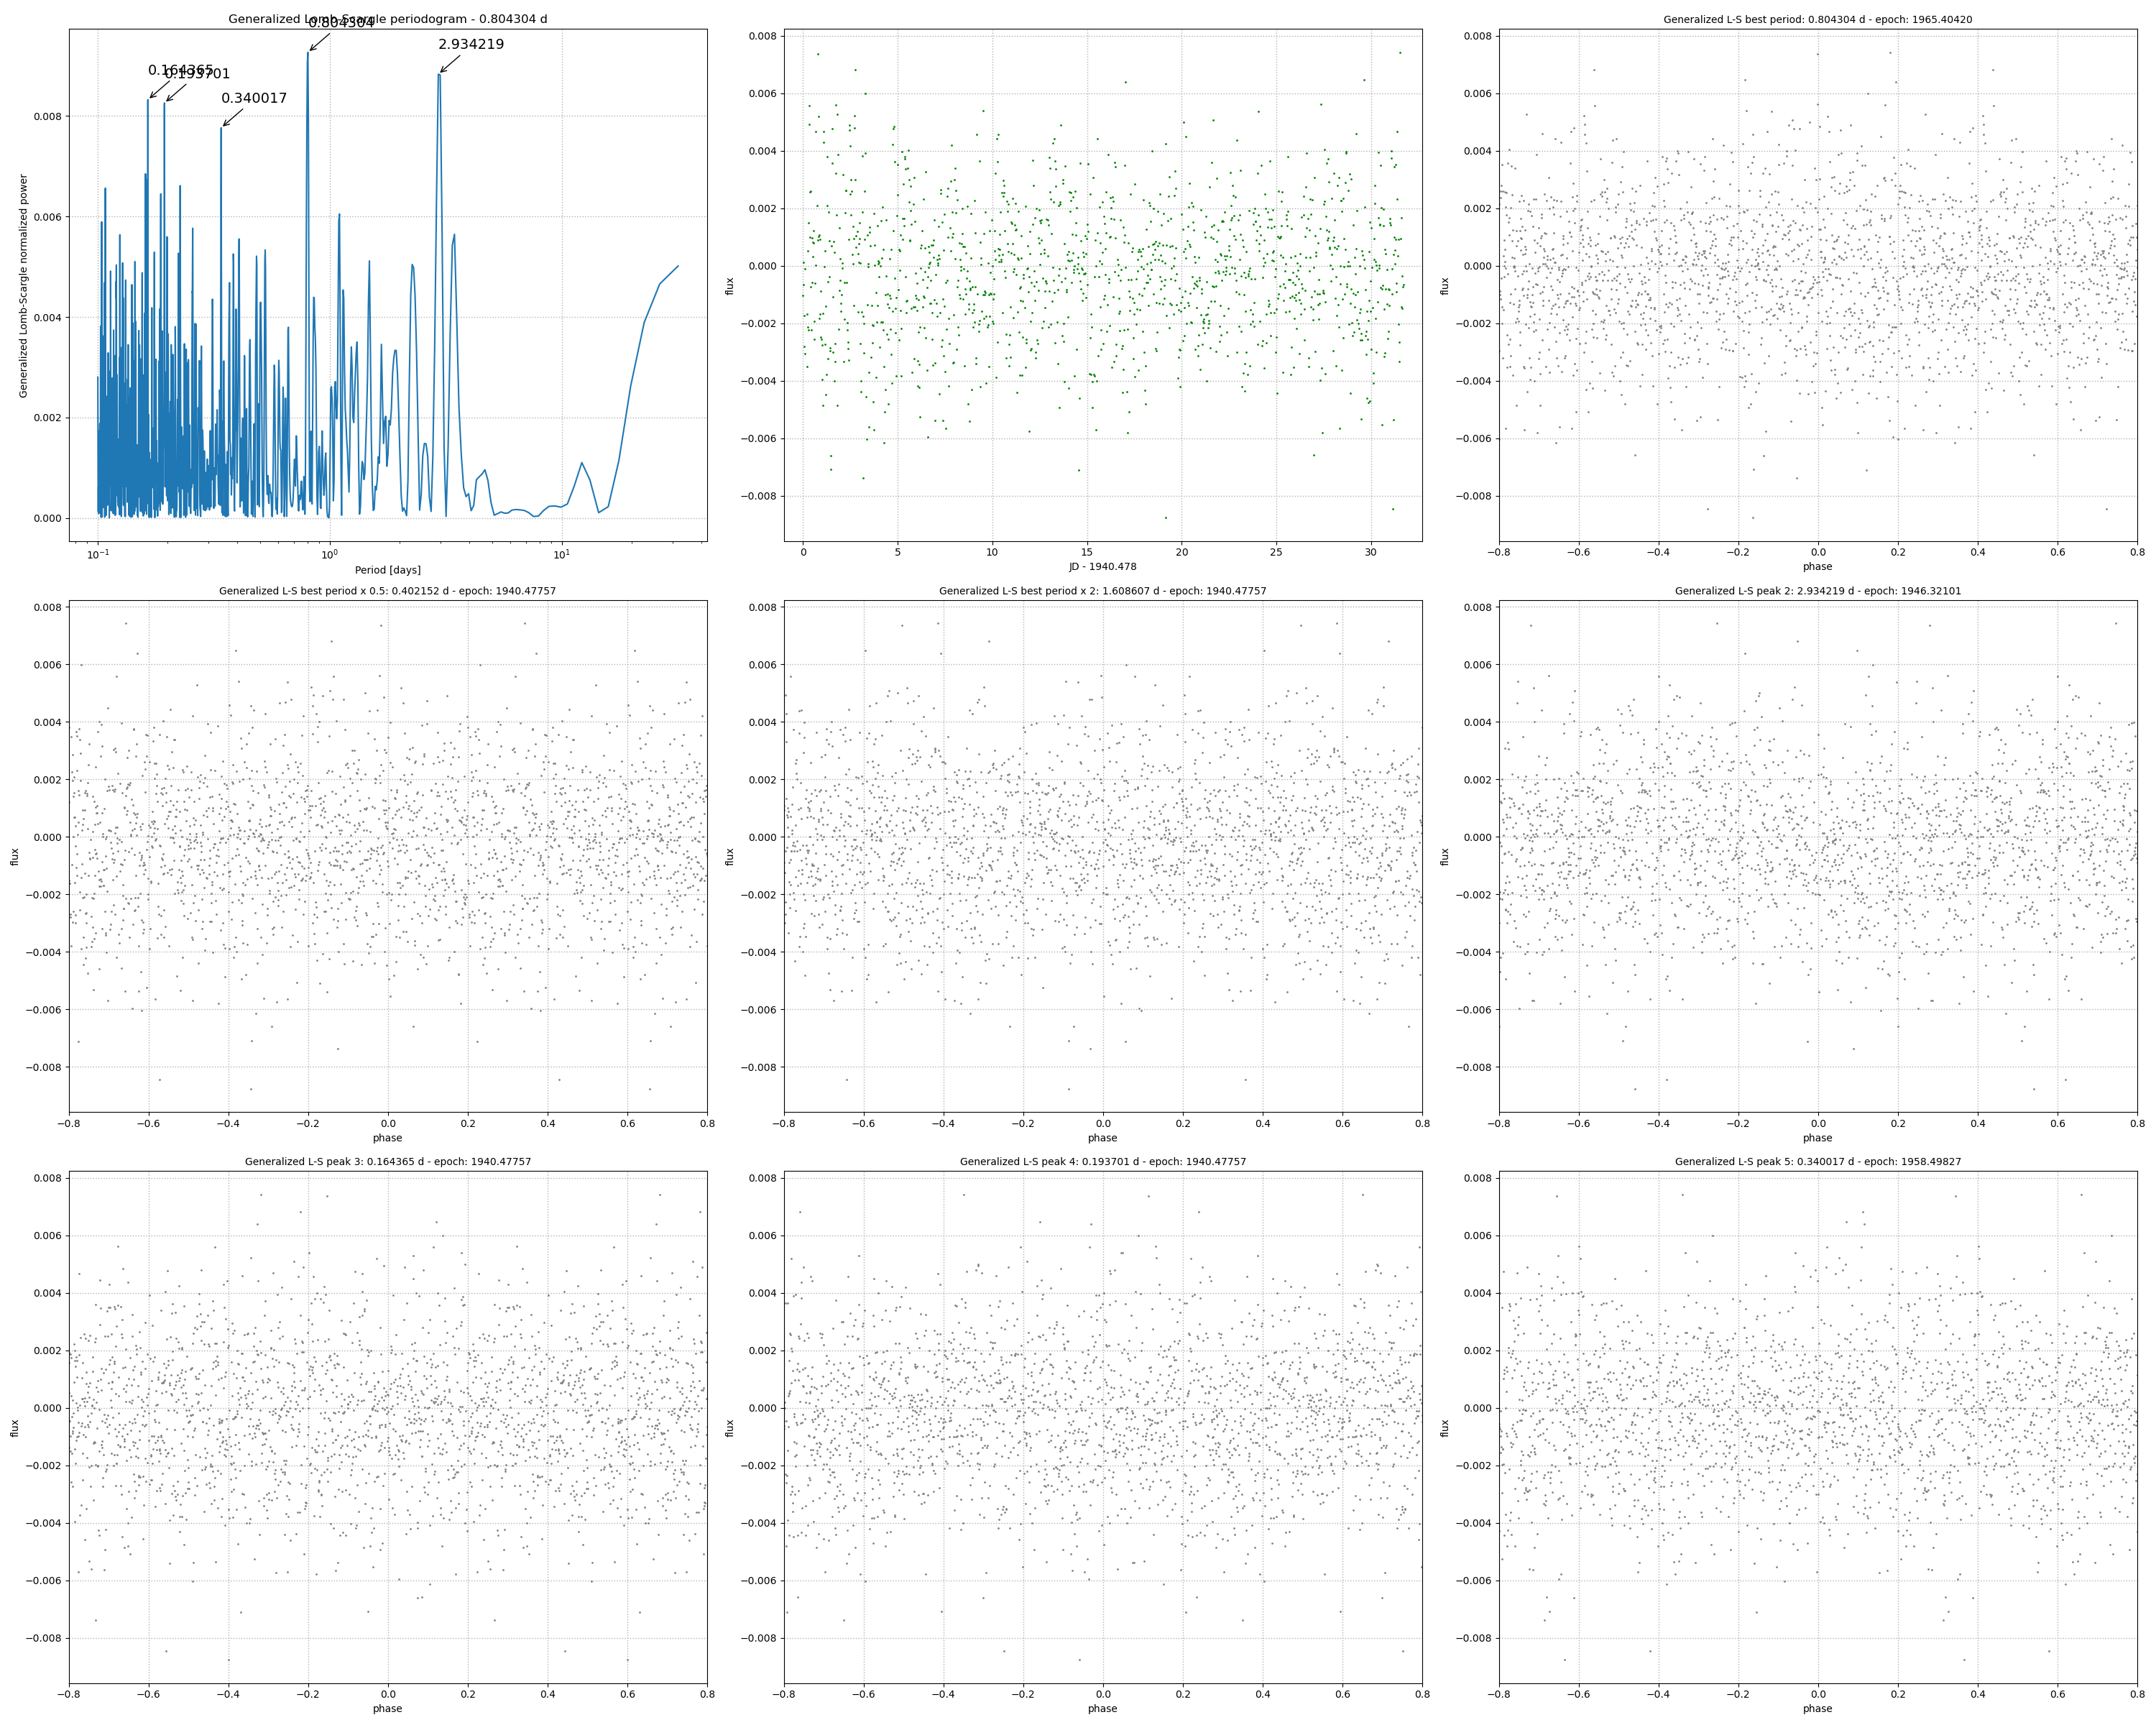

In [8]:
from IPython.display import Image
Image('0000126-checkplot-glsp.png')

In [9]:
glsp

{'bestperiod': 0.8043036591370567,
 'bestlspval': 0.009264914971231905,
 'nbestpeaks': 5,
 'nbestlspvals': [0.009264914971231905,
  0.008830953275757248,
  0.008322904949182804,
  0.008257971580235255,
  0.007764335550342655],
 'nbestperiods': [0.8043036591370567,
  2.934218904629633,
  0.164364959387967,
  0.19370149248166282,
  0.3400167829399146],
 'lspvals': array([0.00501388, 0.00465765, 0.00389141, ..., 0.00141595, 0.00216619,
        0.00280218]),
 'omegas': array([ 0.19827301,  0.23792761,  0.27758222, ..., 62.7335807 ,
        62.7732353 , 62.8128899 ]),
 'periods': array([31.68956417, 26.40797014, 22.63540298, ...,  0.10015665,
         0.10009338,  0.10003019]),
 'method': 'gls',
 'kwargs': {'startp': None,
  'endp': None,
  'stepsize': 0.0001,
  'autofreq': True,
  'periodepsilon': 0.1,
  'nbestpeaks': 5,
  'sigclip': 10.0}}

In [10]:
print('LS algorithm:',(glsp['nbestperiods']),'(days)')

LS algorithm: [0.8043036591370567, 2.934218904629633, 0.164364959387967, 0.19370149248166282, 0.3400167829399146] (days)


In [11]:
bls=periodbase.bls_parallel_pfind(dates,fluxes,errs,magsarefluxes=True)

[I 200811 15:57:32 abls:919] min P: 0.1, max P: 100.0, nfreq: 126632, minfreq: 0.01, maxfreq: 10.0
[I 200811 15:57:32 abls:922] autofreq = True: using AUTOMATIC values for freq stepsize: 7.889032447996576e-05, ndurations: 100, min transit duration: 0.01, max transit duration: 0.4
[W 200811 15:57:32 abls:964] the requested max P = 100.000 is larger than the time base of the observations = 31.690,  will make minfreq = 2 x 1/timebase
[W 200811 15:57:32 abls:969] new minfreq: 0.06311225958397261, maxfreq: 10.0
[I 200811 15:57:32 abls:980] using 6 workers...
[I 200811 15:57:32 abls:1090] worker 1: minfreq = 0.063112, nfreqs = 21105
[I 200811 15:57:32 abls:1090] worker 2: minfreq = 1.728093, nfreqs = 21105
[I 200811 15:57:32 abls:1090] worker 3: minfreq = 3.393073, nfreqs = 21105
[I 200811 15:57:32 abls:1090] worker 4: minfreq = 5.058053, nfreqs = 21105
[I 200811 15:57:32 abls:1090] worker 5: minfreq = 6.723033, nfreqs = 21105
[I 200811 15:57:32 abls:1090] worker 6: minfreq = 8.388014, nfreq

In [12]:
cp = checkplot.checkplot_png(bls, dates, fluxes, errs, magsarefluxes=True)

[W 200811 15:57:45 png:1142] no best period found for this object, skipping...


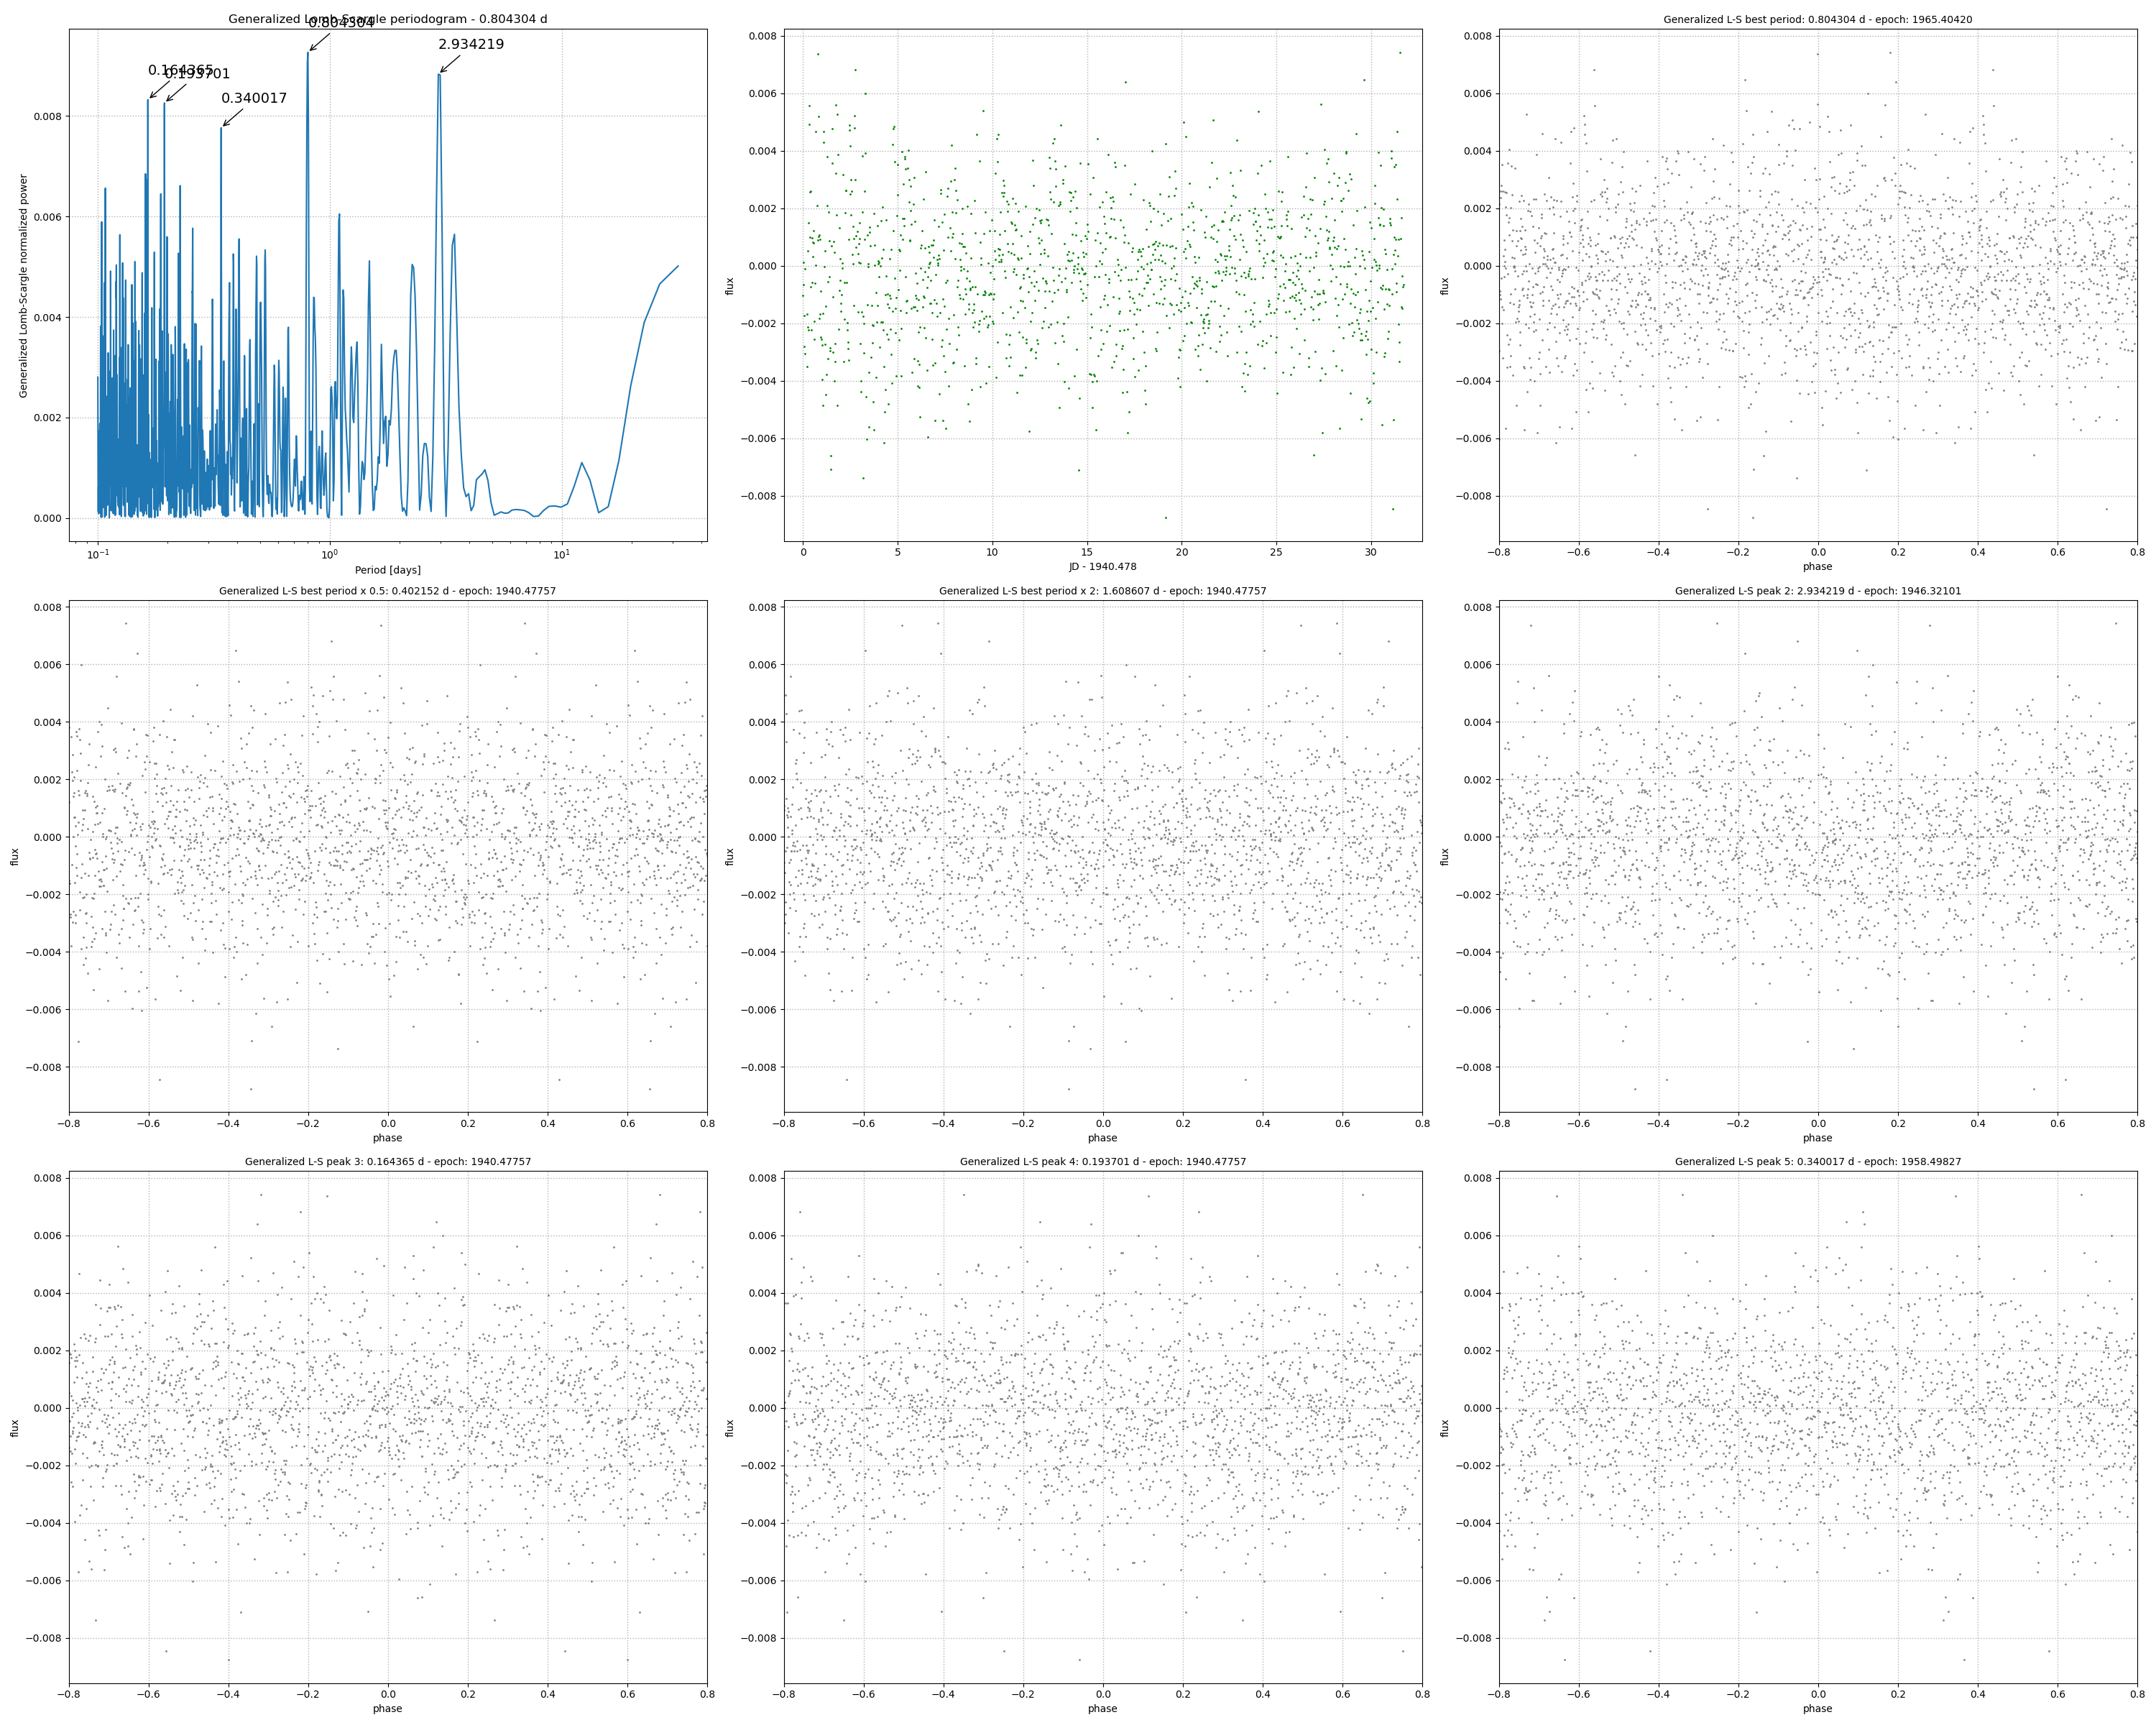

In [13]:
Image('checkplot.png')
# This is the same checkplot from before because no best period was found to create a new checkplot. 

In [14]:
spdm = periodbase.stellingwerf_pdm(dates,fluxes,errs,magsarefluxes=True)

[I 200811 15:58:30 spdm:337] using autofreq with 1580 frequency points, start P = 0.100, end P = 31.690
[I 200811 15:58:30 spdm:349] using 6 workers...


In [15]:
cp = checkplot.checkplot_png(spdm, dates, fluxes, errs, magsarefluxes=True)

[I 200811 15:59:45 nonphysical:216] spline fit done. nknots = 13,  chisq = 13507299.80662, reduced chisq = 9983.22233
[I 200811 15:59:45 png:696] plotting phased LC with period 0.114403, epoch 1970.45086
[I 200811 15:59:45 nonphysical:216] spline fit done. nknots = 13,  chisq = 13545591.79890, reduced chisq = 10011.52387
[I 200811 15:59:45 png:696] plotting phased LC with period 0.057201, epoch 1940.47757
[I 200811 15:59:45 nonphysical:216] spline fit done. nknots = 13,  chisq = 13518133.38302, reduced chisq = 9983.85036
[I 200811 15:59:45 png:696] plotting phased LC with period 0.228806, epoch 1971.59504
[I 200811 15:59:45 nonphysical:216] spline fit done. nknots = 13,  chisq = 13526080.63651, reduced chisq = 9989.71982
[I 200811 15:59:45 png:696] plotting phased LC with period 2.475747, epoch 1970.18524
[I 200811 15:59:45 nonphysical:216] spline fit done. nknots = 13,  chisq = 13425775.03791, reduced chisq = 9915.63888
[I 200811 15:59:45 png:696] plotting phased LC with period 0.9720

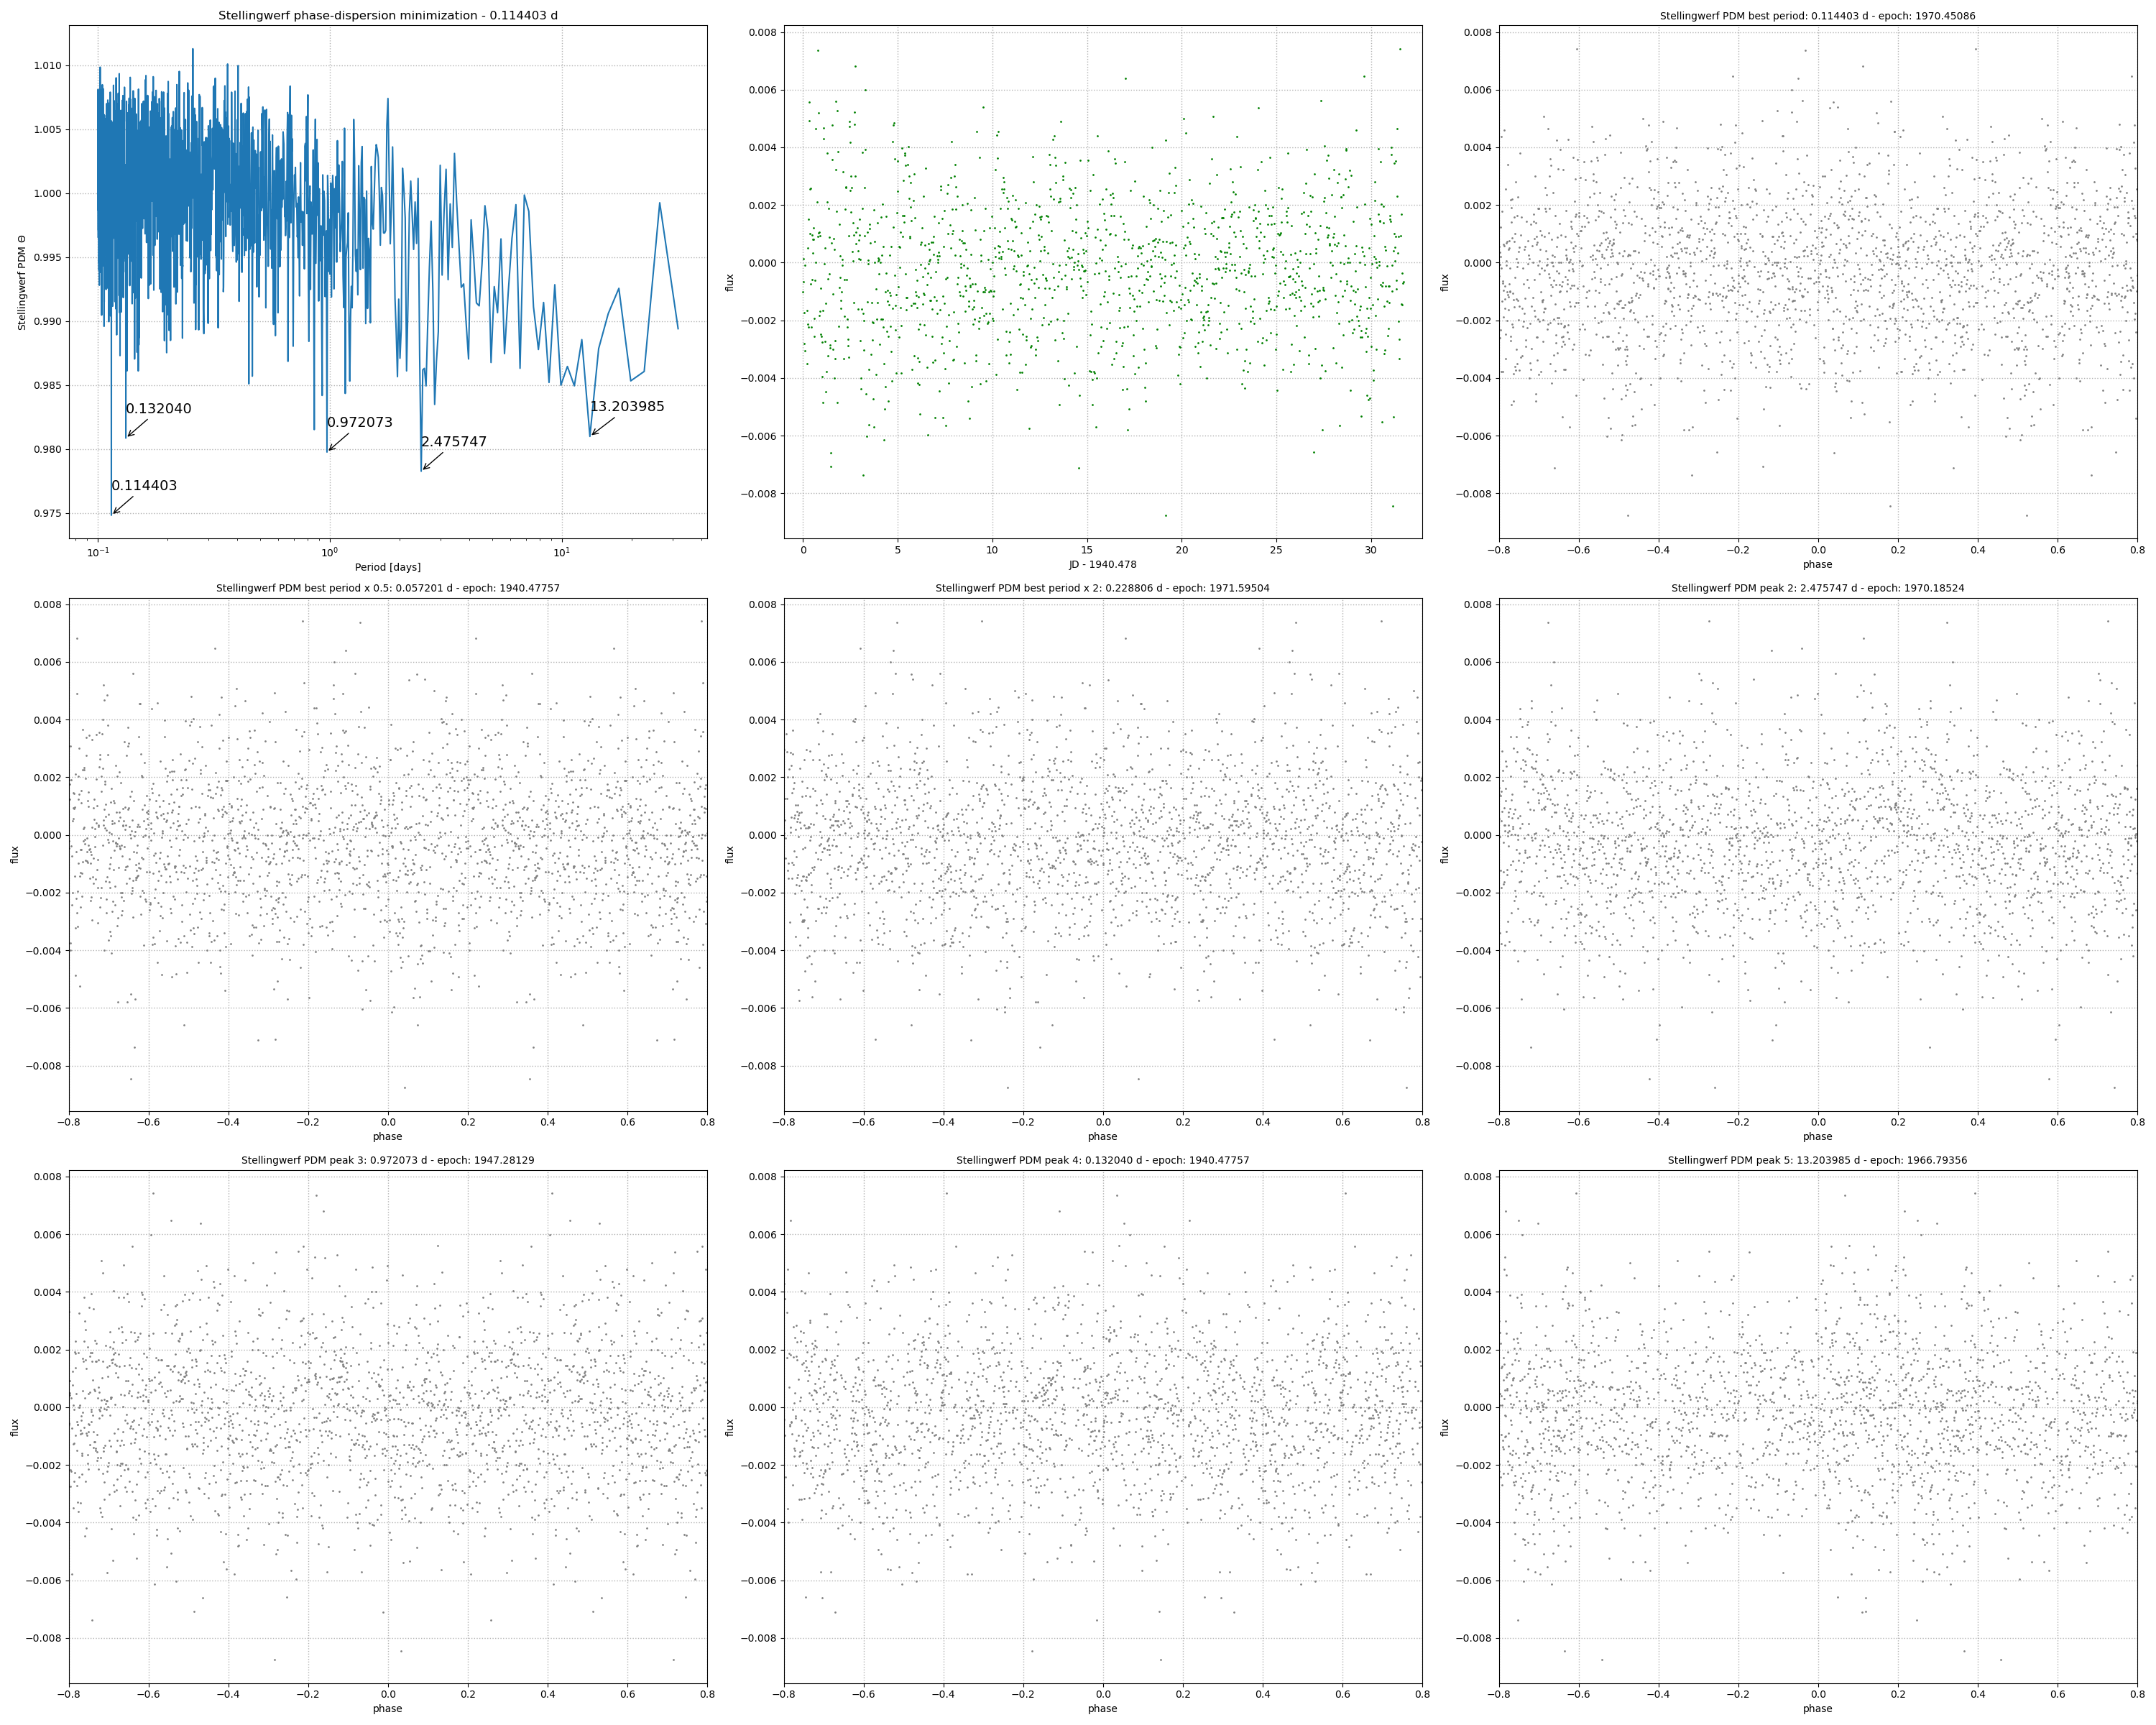

In [16]:
Image('0000126-checkplot-spdm.png')

In [17]:
print('PDM algorithm:',(spdm['nbestperiods']),'(days)')

PDM algorithm: [0.11440275873646223, 2.475747200781253, 0.9720725205521483, 0.1320398507083335, 13.20398507083335] (days)
